# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor

In [2]:
# Formato de negrita
bold_start = '\033[1m'
bold_end = '\033[0m'

In [3]:
# Primer vistazo al Df
df = pd.read_csv('/datasets/car_data.csv')
# Modificar nombre de las colummnas para una mejor visualización
df = df.rename(columns={'DateCrawled' : 'date_crawled', 'Price' : 'price', 'VehicleType' : 'vehicle_type', 'RegistrationYear' : 'registration_year', 'Gearbox' : 'gearbox', 
                        'Power' : 'power','Model' : 'model', 'Mileage':'mileage','RegistrationMonth' : 'registration_month','FuelType':'fuel_type','Brand':'brand',
                        'NotRepaired':'not_repaired', 'DateCreated':'date_created','NumberOfPictures':'nummber_of_pictures','PostalCode':'postal_code','LastSeen':'last_seen'})
print(df.sample(10))

            date_crawled  price vehicle_type  registration_year gearbox  \
2224    22/03/2016 20:56   8500        wagon               2008  manual   
309156  22/03/2016 14:47   2550        wagon               1999    auto   
297663  08/03/2016 16:51   2100        small               2002  manual   
164187  08/03/2016 15:53   3300        sedan               1996  manual   
210433  31/03/2016 18:45   1000        sedan               1996  manual   
138534  14/03/2016 09:50   1500        small               1999  manual   
241057  20/03/2016 10:47    550        other               1996  manual   
89063   18/03/2016 08:38   1500        wagon               2003  manual   
241481  15/03/2016 10:58    700        small               1999  manual   
119953  16/03/2016 19:50  16799        coupe               2010  manual   

        power   model  mileage  registration_month fuel_type       brand  \
2224      143      a4   150000                   9       NaN        audi   
309156    165      a6 

In [4]:
# Revisar estructura y columnas del Df
df.info()
print()
print(f"{bold_start}El dataframe tiene este número de filas y columnas:{bold_end}")
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date_crawled         354369 non-null  object
 1   price                354369 non-null  int64 
 2   vehicle_type         316879 non-null  object
 3   registration_year    354369 non-null  int64 
 4   gearbox              334536 non-null  object
 5   power                354369 non-null  int64 
 6   model                334664 non-null  object
 7   mileage              354369 non-null  int64 
 8   registration_month   354369 non-null  int64 
 9   fuel_type            321474 non-null  object
 10  brand                354369 non-null  object
 11  not_repaired         283215 non-null  object
 12  date_created         354369 non-null  object
 13  nummber_of_pictures  354369 non-null  int64 
 14  postal_code          354369 non-null  int64 
 15  last_seen            354369 non-nu

(354369, 16)

In [5]:
# Revisar la existencia de valores ausentes en todo el dataframe 
#print(f"{bold_start}Número de valores duplicados:{bold_end}",df.duplicated().sum())
print(f"{bold_start}Número de valores ausentes:{bold_end}")
print(df.isna().sum())

Número de valores ausentes:
date_crawled               0
price                      0
vehicle_type           37490
registration_year          0
gearbox                19833
power                      0
model                  19705
mileage                    0
registration_month         0
fuel_type              32895
brand                      0
not_repaired           71154
date_created               0
nummber_of_pictures        0
postal_code                0
last_seen                  0
dtype: int64


In [6]:
# Valores únicos en la columna 'vehicle_type'
print(f"{bold_start}Valores únicos en 'vehicle_type':{bold_end}",df['vehicle_type'].unique())


#Reemplazar valores ausentes en 'vehicle_type' por 'other'
df['vehicle_type'] = df['vehicle_type'].fillna('other')
print(f"{bold_start}Valores únicos en 'vehicle_type' después de reemplazar ausentes:{bold_end}",df['vehicle_type'].unique())


Valores únicos en 'vehicle_type': [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Valores únicos en 'vehicle_type' después de reemplazar ausentes: ['other' 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon']


Valores únicos en 'vehicle_type': ['manual' 'auto' nan]


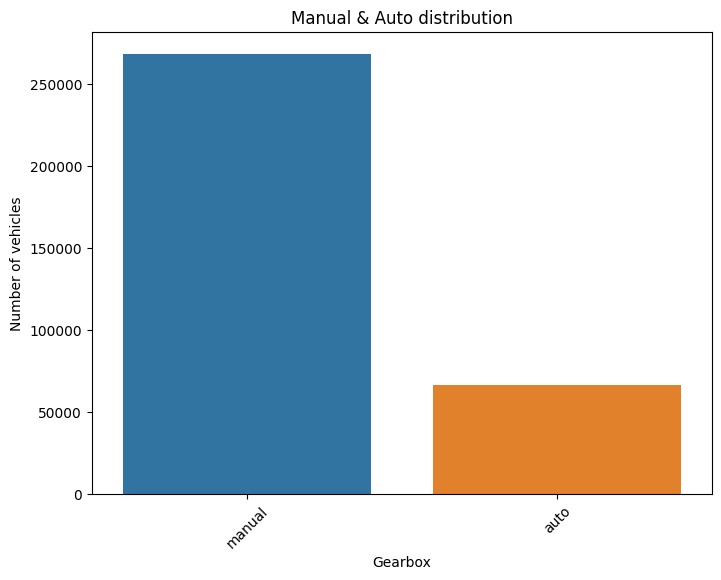

Valores únicos en 'vehicle_type' después de reemplazar ausentes: ['manual' 'auto']


In [7]:
# Valores únicos en la columna 'gearbox'
print(f"{bold_start}Valores únicos en 'vehicle_type':{bold_end}",df['gearbox'].unique())

# Verificamos la distribución entre vehiculos manuales y automáticos
gearbox_counts = df['gearbox'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gearbox')
plt.title('Manual & Auto distribution')
plt.xlabel('Gearbox')
plt.ylabel('Number of vehicles')
plt.xticks(rotation=45)
plt.show()

# #Reemplazar valores ausentes en 'gearbox' por 'manual', ya que la mayoría son manuales.
df['gearbox'] = df['gearbox'].fillna('manual')
print(f"{bold_start}Valores únicos en 'vehicle_type' después de reemplazar ausentes:{bold_end}",df['gearbox'].unique())

In [8]:
# Valores únicos en la columna 'model'
print(f"{bold_start}Valores únicos en 'model':{bold_end}",df['model'].unique())
# #Reemplazar valores ausentes en 'model' por 'other'.
df['model'] = df['model'].fillna('other')

Valores únicos en 'model': ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse'
 '1_reihe' 'avensis' 'roomster' 'sl' 'kaefer' 

Valores únicos en 'fuel_type': ['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']


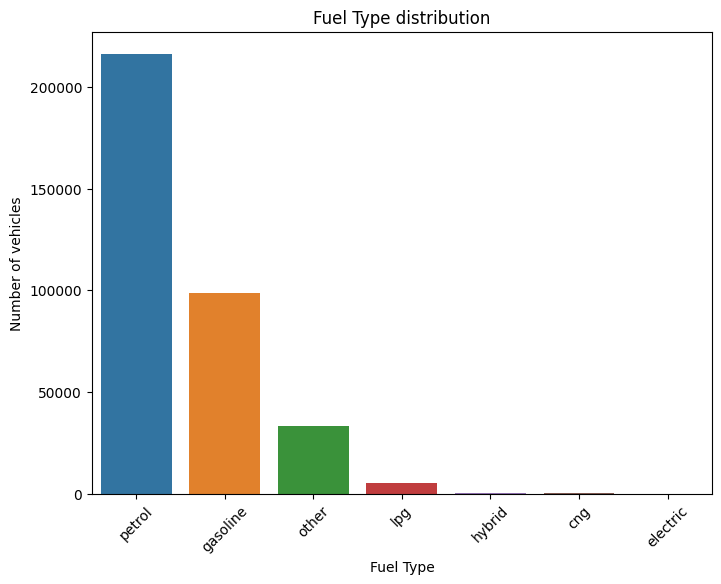

In [9]:
# Valores únicos en la columna 'fuel_type'
print(f"{bold_start}Valores únicos en 'fuel_type':{bold_end}",df['fuel_type'].unique())

#Reemplazar valores ausentes en 'fuel_type' por 'other'.
df['fuel_type'] = df['fuel_type'].fillna('other')

# Verificamos la distribución del tipo de combustible después de reemplazar ausentes por other. Aunque 'other' pasa a 3 lugar después del reemplazo
# es mejor hacer esta modificación a eliminar las filas ausentes.
gearbox_counts = df['fuel_type'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='fuel_type')
plt.title('Fuel Type distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Number of vehicles')
plt.xticks(rotation=45)
plt.show()

Valores únicos en 'fuel_type': [nan 'yes' 'no']


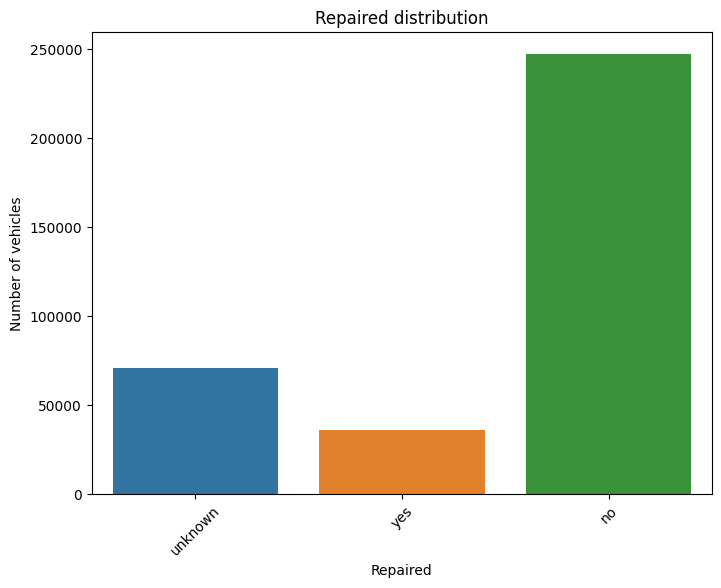

In [10]:

# Valores únicos en la columna 'fuel_type'
print(f"{bold_start}Valores únicos en 'fuel_type':{bold_end}",df['not_repaired'].unique())


#Reemplazar valores ausentes en 'not_repaired' por 'unknown', ya que los valores ausentes representan el 20% de los datos de la columna
df['not_repaired'] = df['not_repaired'].fillna('unknown')

# Verificamos la distribución de 'not_repaired' después de reemplazar ausentes por unknown.
gearbox_counts = df['not_repaired'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='not_repaired')
plt.title('Repaired distribution')
plt.xlabel('Repaired')
plt.ylabel('Number of vehicles')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Revisar la existencia de valores ausentes después de la modificaciones.
print(f"{bold_start}Número de valores ausentes:{bold_end}")
print(df.isna().sum())
print()
df.info()

Número de valores ausentes:
date_crawled           0
price                  0
vehicle_type           0
registration_year      0
gearbox                0
power                  0
model                  0
mileage                0
registration_month     0
fuel_type              0
brand                  0
not_repaired           0
date_created           0
nummber_of_pictures    0
postal_code            0
last_seen              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date_crawled         354369 non-null  object
 1   price                354369 non-null  int64 
 2   vehicle_type         354369 non-null  object
 3   registration_year    354369 non-null  int64 
 4   gearbox              354369 non-null  object
 5   power                354369 non-null  int64 
 6   model                354369 non-null  obje

In [12]:
print(f"{bold_start}Número de valores duplicados:{bold_end}",df.duplicated().sum())
#duplicated = df[df.duplicated()]
#print(duplicated)

# Eliminados todas las filas que están completamente duplicadas
df_no_duplicates = df.drop_duplicates().copy()

# Revisamos nuevamente que no tengamos duplicados
print(f"{bold_start}Número de valores duplicados:{bold_end}",df_no_duplicates.duplicated().sum())
df_no_duplicates.info()
print()
print(f"{bold_start}El dataframe tiene este número de filas y columnas después de eliminar duplicados:{bold_end}")
df.shape

Número de valores duplicados: 264
Número de valores duplicados: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354105 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date_crawled         354105 non-null  object
 1   price                354105 non-null  int64 
 2   vehicle_type         354105 non-null  object
 3   registration_year    354105 non-null  int64 
 4   gearbox              354105 non-null  object
 5   power                354105 non-null  int64 
 6   model                354105 non-null  object
 7   mileage              354105 non-null  int64 
 8   registration_month   354105 non-null  int64 
 9   fuel_type            354105 non-null  object
 10  brand                354105 non-null  object
 11  not_repaired         354105 non-null  object
 12  date_created         354105 non-null  object
 13  nummber_of_pictures  354105 non-null  int64 
 14  postal_code       

(354369, 16)

In [13]:
# Modificar formato de las columnas con fechas para que sean datetime. 
date_columns = ['date_crawled', 'date_created', 'last_seen']

for col in date_columns:
    df_no_duplicates[col] = pd.to_datetime(df_no_duplicates[col])
#df_no_duplicates['date_crawled'] = pd.to_datetime(df_no_duplicates['date_crawled'])
#df_no_duplicates['date_created'] = pd.to_datetime(df_no_duplicates['date_created'])
#df_no_duplicates['last_seen'] = pd.to_datetime(df_no_duplicates['last_seen'])

In [14]:
#print(df_no_duplicates['date_crawled'].head())
#print(df_no_duplicates['date_created'].head())
#print()
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354105 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_crawled         354105 non-null  datetime64[ns]
 1   price                354105 non-null  int64         
 2   vehicle_type         354105 non-null  object        
 3   registration_year    354105 non-null  int64         
 4   gearbox              354105 non-null  object        
 5   power                354105 non-null  int64         
 6   model                354105 non-null  object        
 7   mileage              354105 non-null  int64         
 8   registration_month   354105 non-null  int64         
 9   fuel_type            354105 non-null  object        
 10  brand                354105 non-null  object        
 11  not_repaired         354105 non-null  object        
 12  date_created         354105 non-null  datetime64[ns]
 13  nummber_of_pic



<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Se realizaron los ajustes necesarios al df para una mejor estructura de datos. 
- Se reemplazaron datos ausentes.
- Se eliminaron duplicados.
- Se modificaron los tipo de datos de las columnas con fechas. 

</div>



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Preparación de datos bien lograda: imputación clara, eliminación de duplicados y conversión de fechas consistente, con verificaciones exploratorias útiles. Sólido punto de partida para el modelado. </div>


## Entrenamiento del modelo 

In [15]:
# Aplicar One-Hot Encoding para que los modelos puedan trabajar con caracteristicas que no son númericas

df_ohe = pd.get_dummies(df_no_duplicates, columns=['vehicle_type','gearbox','model','fuel_type','brand','not_repaired'] , drop_first=True)
print(df_ohe)

              date_crawled  price  registration_year  power  mileage  \
0      2016-03-24 11:52:00    480               1993      0   150000   
1      2016-03-24 10:58:00  18300               2011    190   125000   
2      2016-03-14 12:52:00   9800               2004    163   125000   
3      2016-03-17 16:54:00   1500               2001     75   150000   
4      2016-03-31 17:25:00   3600               2008     69    90000   
...                    ...    ...                ...    ...      ...   
354364 2016-03-21 09:50:00      0               2005      0   150000   
354365 2016-03-14 17:48:00   2200               2005      0    20000   
354366 2016-05-03 19:56:00   1199               2000    101   125000   
354367 2016-03-19 18:57:00   9200               1996    102   150000   
354368 2016-03-20 19:41:00   3400               2002    100   150000   

        registration_month date_created  nummber_of_pictures  postal_code  \
0                        0   2016-03-24                   

In [16]:
# Separar las columnas en features y el precio en target. 
features = df_ohe.drop(['price','date_crawled','date_created','last_seen'], axis=1)
target = df_ohe['price']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

In [17]:
# Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [18]:
mse = mean_squared_error(target_valid, predicted_valid)
rmse = mse **0.5
print('MSE:', mse)
print('RMSE Linear Regression:', rmse)

MSE: 10036169.501772815
RMSE Linear Regression: 3167.9913986267097


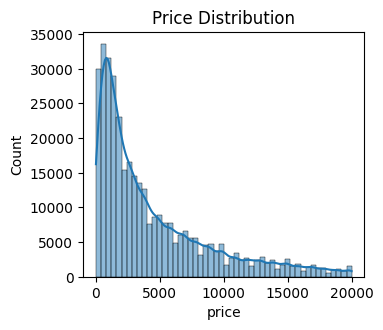

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
sns.histplot(df_ohe['price'], kde = True, bins = 50 )
#title = col_serie.name.title()
plt.title('Price Distribution')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Price Distribution')

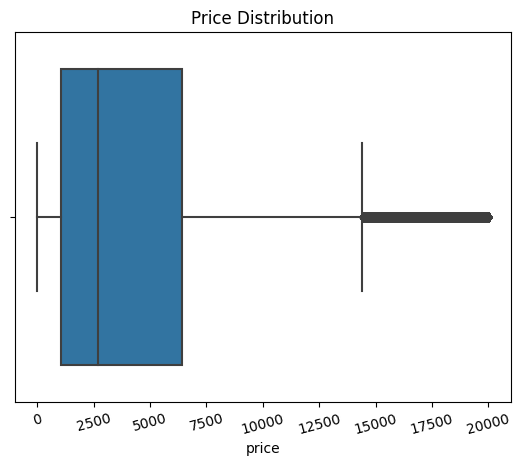

In [20]:
sns.boxplot(df_ohe['price'] )
plt.xticks(rotation=15)
plt.title('Price Distribution')

In [21]:
df_ohe['price'].describe()

count    354105.000000
mean       4416.414179
std        4514.312633
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>
    
Resultado Modelo de Regresión Lineal:
    
Un MSE de 10,036,169.50 indica que, en promedio, el cuadrado de la diferencia entre los precios predichos y los precios reales es bastante alto. Esto sugiere que hay una variabilidad significativa en las predicciones del modelo.

Un RMSE de 3,167.99 significa que, en promedio, las predicciones del modelo están a unos 3,168 euros de los valores reales. 

El RMSE es superior a la mediana de precios. 

</div>



In [22]:
# Modelo Bosque Aleatorio
model = RandomForestRegressor(random_state=12345, n_estimators=10,max_depth =10) 

model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)


mse = mean_squared_error(target_valid, predicted_valid)
rmse = mse ** 0.5
print('RMSE Random Forest Regressor:', rmse)

RMSE Random Forest Regressor: 2021.0781542242598




<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>
    
Resultado Modelo de Bosques Aleatorio de Regresión:

Al implementar este modelo, obtenemos un RMSE de 2021.07, lo que indica que el modelo presenta una desviación de 2021.07 euros en la estimación de los precios. La cual es inferior a la mediana de la distribución de la variable precio (2700 euros). El modelo tiene una error promedio de 2021.07. 

Es mejor que el modelo de regresión lineal y está por debajo de la mediana de la distributión de la variable precios. 

</div>




In [23]:
# Modelo LightGBM
model = LGBMRegressor(num_leaves= 31, learning_rate = 0.1, n_estimators=100, random_state=12345 )
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)
rmse = mse ** 0.5
print('RMSE Modelo LightGBM:', rmse)

model = LGBMRegressor(num_leaves= 50, learning_rate = 0.01, n_estimators=200, random_state=12345 )
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)
rmse = mse ** 0.5
print('RMSE Modelo LightGBM:', rmse)

RMSE Modelo LightGBM: 1825.166047250274
RMSE Modelo LightGBM: 2153.1638646365654




<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>
    
Resultado Modelo de LightGBM:
- Con los parametros num_leaves= 31, learning_rate = 0.1 & n_estimators=100 se obtiene un RSME de 1825.16. Es el más bajo hasta este momento.
- Con esto podemos concluir que este modelo tiene un mejor desempeño que la Regresión Lineal y Bosques Aleatorios. 

</div>




In [24]:
# Modelo CatBoost
model = CatBoostRegressor(num_leaves= 31, learning_rate = 0.1, n_estimators=50, random_state=12345 )
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)
rmse = mse ** 0.5
print('RMSE Modelo CatBoost:', rmse)
print()

model = CatBoostRegressor(num_leaves= 31, learning_rate = 0.1, n_estimators=100, random_state=12345 )
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)
rmse = mse ** 0.5
print('RMSE Modelo CatBoost:', rmse)

0:	learn: 4235.4062729	total: 65.3ms	remaining: 3.2s
1:	learn: 3987.7803559	total: 80.3ms	remaining: 1.93s
2:	learn: 3771.1649872	total: 94.6ms	remaining: 1.48s
3:	learn: 3584.4002209	total: 110ms	remaining: 1.26s
4:	learn: 3423.2599404	total: 125ms	remaining: 1.12s
5:	learn: 3279.1704147	total: 139ms	remaining: 1.02s
6:	learn: 3148.5717633	total: 153ms	remaining: 943ms
7:	learn: 3037.4434697	total: 168ms	remaining: 884ms
8:	learn: 2939.7626954	total: 183ms	remaining: 834ms
9:	learn: 2854.1975958	total: 197ms	remaining: 788ms
10:	learn: 2780.9697401	total: 211ms	remaining: 749ms
11:	learn: 2716.6177896	total: 226ms	remaining: 715ms
12:	learn: 2656.7410162	total: 240ms	remaining: 682ms
13:	learn: 2606.8010395	total: 254ms	remaining: 654ms
14:	learn: 2561.5073670	total: 269ms	remaining: 627ms
15:	learn: 2518.9200254	total: 283ms	remaining: 601ms
16:	learn: 2483.4483323	total: 296ms	remaining: 575ms
17:	learn: 2451.9967035	total: 310ms	remaining: 551ms
18:	learn: 2422.1207469	total: 324ms

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>
    
Resultado Modelo de CatBoost:
- Con los parametros num_leaves= 31, learning_rate = 0.1 & n_estimators=100 se obtiene un RSME de 1946.75, un poco más alto que el LightGBM.

</div>



In [25]:
# Modelo XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=12345)
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)
rmse = mse ** 0.5
print('RMSE Modelo XGBoost:', rmse)
print()

model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=3, random_state=12345)
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)
rmse = mse ** 0.5
print('RMSE Modelo XGBoost:', rmse)

RMSE Modelo XGBoost: 2046.0200231268605

RMSE Modelo XGBoost: 1962.4497427896406


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>
    
Resultado Modelo de XGBoost:
- Con los parametros learning_rate = 0.1, n_estimators=100 & max_depth=3 se obtiene un RSME de 1962.44, un poco más alto que el LightGBM.

</div>


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Entrenamiento muy completo: aplicaste codificación adecuada y comparaste múltiples algoritmos con resultados claros en RMSE. Se evidencia un análisis ordenado y una interpretación sólida de cada modelo. </div>


## Análisis del modelo

In [26]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, max_depth=10),
    'LightGBM': LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=100),
    'CatBoost': CatBoostRegressor(num_leaves= 31, learning_rate = 0.1, n_estimators=100),
    'XGBoost' : XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3)                             
}

results = {}
for name, model in models.items():
    print(f"\n--- {name} ---")
    %time model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))
    print(f"RMSE: {rmse:.2f}")
    


--- Linear Regression ---
CPU times: user 12.2 s, sys: 5.24 s, total: 17.4 s
Wall time: 9.11 s
RMSE: 3167.99

--- Random Forest ---
CPU times: user 24.1 s, sys: 396 ms, total: 24.5 s
Wall time: 24.4 s
RMSE: 2021.04

--- LightGBM ---
CPU times: user 6.45 s, sys: 168 ms, total: 6.61 s
Wall time: 3.53 s
RMSE: 1827.55

--- CatBoost ---
0:	learn: 4236.8024094	total: 14.9ms	remaining: 1.47s
1:	learn: 3989.6531307	total: 30.1ms	remaining: 1.47s
2:	learn: 3772.8108379	total: 46ms	remaining: 1.49s
3:	learn: 3584.1496187	total: 62.7ms	remaining: 1.5s
4:	learn: 3416.5196746	total: 77.5ms	remaining: 1.47s
5:	learn: 3271.4863954	total: 92.1ms	remaining: 1.44s
6:	learn: 3148.3227457	total: 107ms	remaining: 1.42s
7:	learn: 3041.3344634	total: 121ms	remaining: 1.4s
8:	learn: 2939.0084943	total: 136ms	remaining: 1.37s
9:	learn: 2853.9702734	total: 150ms	remaining: 1.35s
10:	learn: 2779.7294395	total: 164ms	remaining: 1.33s
11:	learn: 2714.2746058	total: 178ms	remaining: 1.31s
12:	learn: 2653.5322946	t

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Después de analizar el tiempo de ejecuciónd de cada modelo y el mejor RSME, se concluye que el LightGBM es el mejor modelo. Aunque no tiene mucha diferencia en velocidad con el CatBoost, su RSME es inferior. 
Por otro lado, el XGBoost es el modelo que más recursos computacionales consume, pero tiene un mejor RSME que la Regresión Lineal y Bosques Aleatorios.

Finalmente se concluye que los modelos con potenciación de gradiente tienen un mejor rendimiento que la Regresión Lineal y Bosque Aleatorios, por lo tanto, los modelos están siendo efectivos en las prediciones. 

</div>


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El análisis comparativo de modelos está muy bien estructurado, con evaluación de métricas y tiempos de ejecución que respaldan la elección final. La conclusión es clara y coherente con los resultados obtenidos. </div>


## Comentario general del revisor



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente dominio en la preparación, análisis y modelado de datos, siguiendo de manera fiel lo establecido en el brief.  

#### Puntos Positivos:

* **Procesamiento de datos:** Realizaste una limpieza completa, imputación de valores ausentes, eliminación de duplicados y conversión de tipos de datos, logrando un dataset confiable para el modelado.
* **Visualización y análisis gráfico:** Incorporaste gráficos para explorar las variables, lo que enriquece la interpretación del dataset.
* **Ingeniería de características:** Aplicaste adecuadamente técnicas como One-Hot Encoding, lo que permitió a los modelos trabajar con variables categóricas de manera eficiente.
* **Comparación de modelos:** Probaste regresión lineal, bosque aleatorio y varios métodos de gradient boosting (LightGBM, CatBoost y XGBoost), evaluando métricas y tiempos de ejecución, para concluir con un análisis sólido y justificado de cuál modelo se desempeña mejor.

Has logrado un trabajo bien estructurado, ordenado y con conclusiones claras que responden al objetivo del proyecto. Excelente avance en tu formación. </div>


# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos